In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
import numpy as np

In [14]:
# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("MAST30034 Tutorial 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .getOrCreate()
)

In [4]:
merchant_info = spark.read.parquet('../data/curated/merchant_info.parquet')
merchant_info = merchant_info.toPandas()
# View the relationship between travel_time_mins vs tip_amount
# plot

def get_bin(df,bar_num):
    bar_list = []
    max_value = int(df.max()+1)
    min_value = int(df.min())
    t_bar_range = max_value - min_value
    bar_range = np.round(t_bar_range/bar_num)
    for i in range(0 ,bar_num):
        num = min_value + i*bar_range
        bar_list.append(num)
    bar_list.append(max_value)
    return bar_list

## Average value of each order

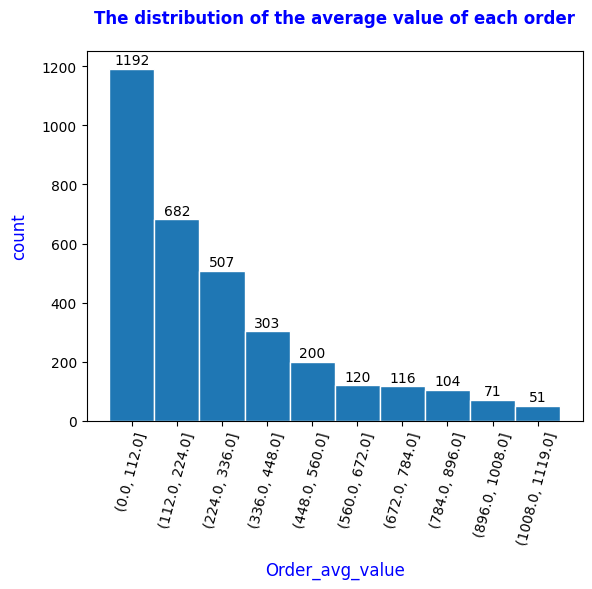

In [5]:
bins = get_bin(merchant_info['count_cus_per_mon'],10)

dff_count_cus_per_mon = merchant_info.groupby(pd.cut(merchant_info['Order_avg_value'], bins=bins))['fix_cus_num'].count()
dff_count_cus_per_mon = dff_count_cus_per_mon.to_frame().reset_index()
dff = dff_count_cus_per_mon.rename(columns={"Order_avg_value": "index", "fix_cus_num": "count"})

fig, ax = plt.subplots()

y = dff['count']

bars = ax.bar(
    x = range(1,11),
    height = y, edgecolor='white',
    tick_label = dff['index'], width = 1
)
plt.xticks(rotation=75)

# add the average tip_amount number on the top of each bar chart
ax.bar_label(bars, padding=1, color = 'black', fontsize=10)
ax.xaxis.grid(False)

# show the bar chart and add the title and labels
ax.set_ylabel('count', labelpad = 10, color = 'blue', fontsize=12)
ax.set_xlabel('Order_avg_value', labelpad = 10, color = 'blue', fontsize=12)
ax.set_title('The distribution of the average value of each order', pad = 20, color = 'blue', weight = 'bold')
plt.savefig('../plots/avg_value_per_order.png', bbox_inches='tight')

## Average number of different consumers per month per shop

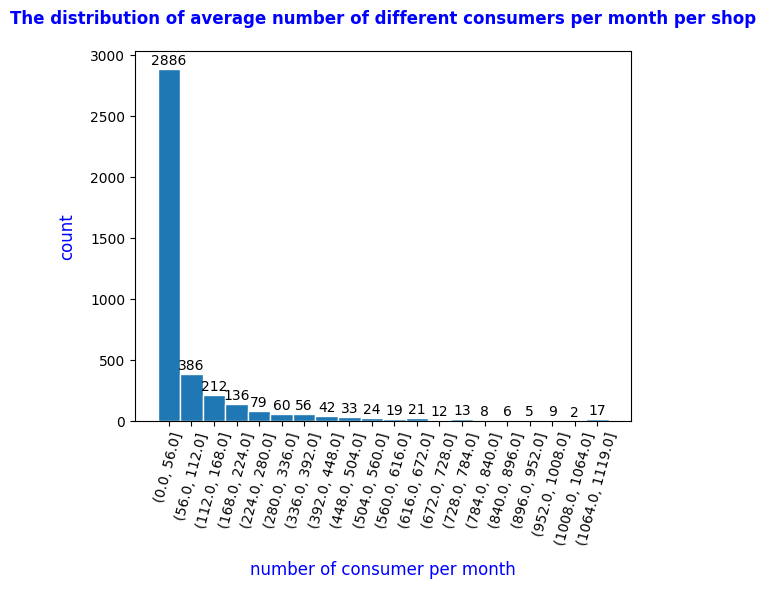

In [12]:
bins = get_bin(merchant_info['count_cus_per_mon'],20)

dff_count_cus_per_mon = merchant_info.groupby(pd.cut(merchant_info['count_cus_per_mon'], bins=bins))['fix_cus_num'].count()
dff_count_cus_per_mon = dff_count_cus_per_mon.to_frame().reset_index()
dff = dff_count_cus_per_mon.rename(columns={"count_cus_per_mon": "index", "fix_cus_num": "count"})

fig, ax = plt.subplots()

y = dff['count']

bars = ax.bar(
    x = range(1,21),
    height = y, edgecolor='white',
    tick_label = dff['index'], width = 1
)
plt.xticks(rotation=75)

# add the average tip_amount number on the top of each bar chart
ax.bar_label(bars, padding=1, color = 'black', fontsize=10)
ax.xaxis.grid(False)

# show the bar chart and add the title and labels
ax.set_ylabel('count', labelpad = 10, color = 'blue', fontsize=12)
ax.set_xlabel('number of consumer per month', labelpad = 10, color = 'blue', fontsize=12)
ax.set_title('The distribution of average number of different consumers per month per shop', pad = 20, color = 'blue', weight = 'bold')
plt.savefig('../plots/num_of_customer_per_month.png')

## Average amount of the transaction in each month

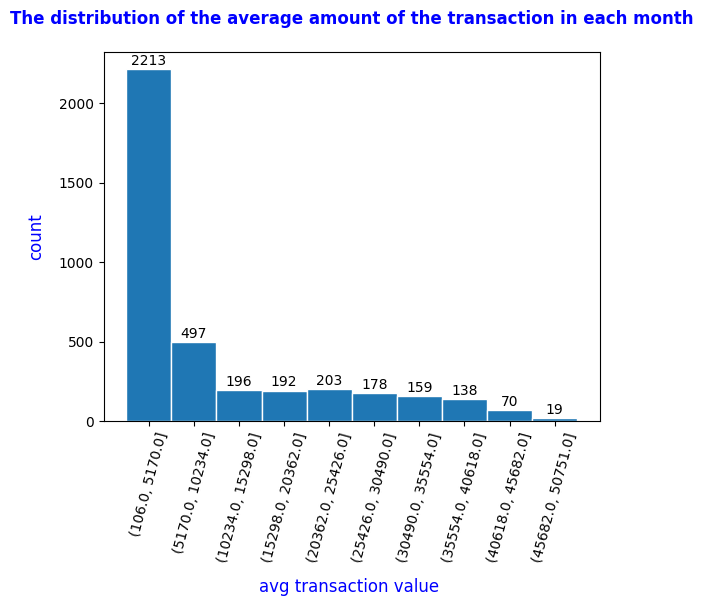

In [7]:
merchant_info_amount_small = merchant_info[merchant_info['Avg_amount_monthly'] <= 51000]
merchant_info_amount_large = merchant_info[merchant_info['Avg_amount_monthly'] > 51000]

bins = get_bin(merchant_info_amount_small['Avg_amount_monthly'],10)

dff_count_cus_per_mon = merchant_info_amount_small.groupby(pd.cut(merchant_info['Avg_amount_monthly'], bins=bins))['fix_cus_num'].count()
dff_count_cus_per_mon = dff_count_cus_per_mon.to_frame().reset_index()
dff = dff_count_cus_per_mon.rename(columns={"Avg_amount_monthly": "index", "fix_cus_num": "count"})

fig, ax = plt.subplots()

y = dff['count']

bars = ax.bar(
    x = range(1,11),
    height = y, edgecolor='white',
    tick_label = dff['index'], width = 1
)
plt.xticks(rotation=75)

# add the average tip_amount number on the top of each bar chart
ax.bar_label(bars, padding=1, color = 'black', fontsize=10)
ax.xaxis.grid(False)

# show the bar chart and add the title and labels
ax.set_ylabel('count', labelpad = 10, color = 'blue', fontsize=12)
ax.set_xlabel('avg transaction value ', labelpad = 10, color = 'blue', fontsize=12)
ax.set_title('The distribution of the average amount of the transaction in each month', pad = 20, color = 'blue', weight = 'bold')
plt.savefig('../plots/avg_amount_count_small.png', bbox_inches='tight')

## Number of different store type with large monthly sales

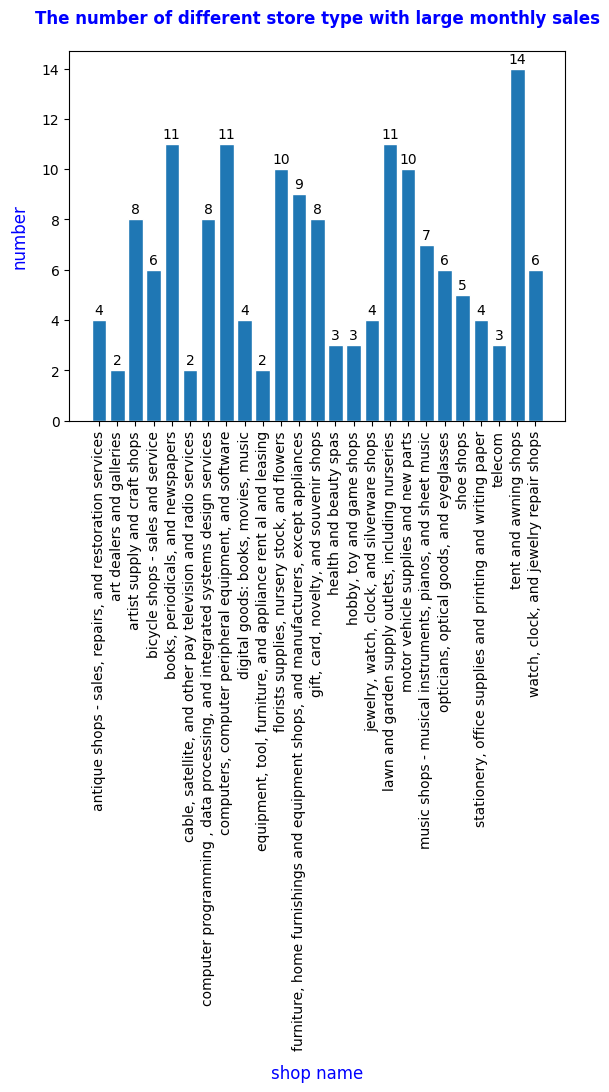

In [13]:
# store type with large amount
tz_df = merchant_info_amount_large[['Store_type','Revenue_levels']].groupby(['Store_type']).count()

fig, ax = plt.subplots()

y = tz_df['Revenue_levels']

bars = ax.bar(
    x = range(1,26),
    height = y, edgecolor='white',
    tick_label = tz_df.index, width = 0.8
)

plt.xticks(rotation=90)
ax.bar_label(bars, padding=2, color = 'black', fontsize=10)
ax.xaxis.grid(False)

ax.set_ylabel('number', labelpad = 10, color = 'blue', fontsize=12)
ax.set_xlabel('shop name', labelpad = 10, color = 'blue', fontsize=12)
ax.set_title('The number of different store type with large monthly sales', pad = 20, color = 'blue', weight = 'bold')
plt.savefig('../plots/store_type_large_amount.png', bbox_inches='tight')

## Average count of the transaction under 1400 in each month (small)

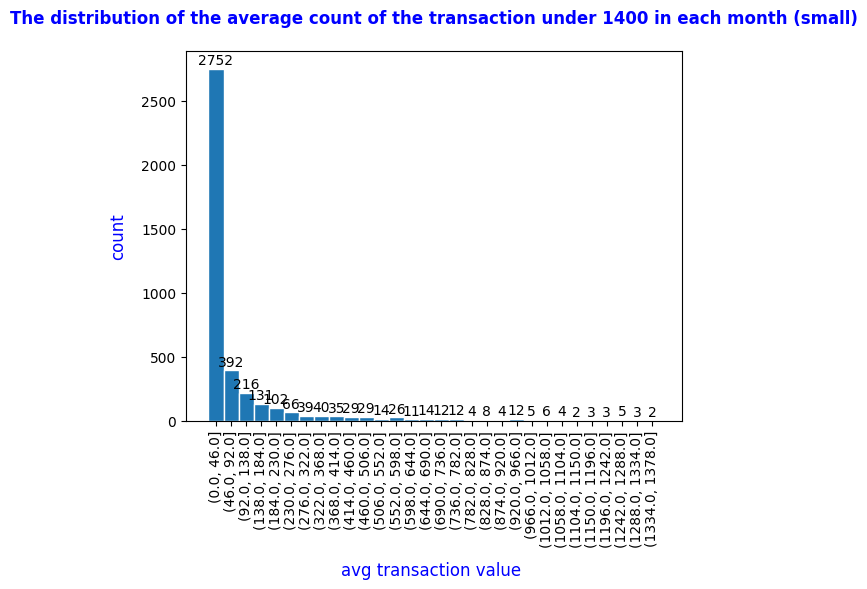

In [9]:
merchant_info_count_small = merchant_info[merchant_info['Avg_count_monthly'] <= 1400]
merchant_info_count_large = merchant_info[merchant_info['Avg_count_monthly'] > 1400]

# Avg_count_monthly_small
bins = get_bin(merchant_info_count_small['Avg_count_monthly'],30)

dff_count_cus_per_mon = merchant_info_count_small.groupby(pd.cut(merchant_info_count_small['Avg_count_monthly'], bins=bins))['fix_cus_num'].count()
dff_count_cus_per_mon = dff_count_cus_per_mon.to_frame().reset_index()
dff = dff_count_cus_per_mon.rename(columns={"Avg_count_monthly": "index", "fix_cus_num": "count"})

fig, ax = plt.subplots()

y = dff['count']

bars = ax.bar(
    x = range(1,31),
    height = y, edgecolor='white',
    tick_label = dff['index'], width = 1
)
plt.xticks(rotation=90)

# add the average tip_amount number on the top of each bar chart
ax.bar_label(bars, padding=1, color = 'black', fontsize=10)
ax.xaxis.grid(False)


# show the bar chart and add the title and labels
ax.set_ylabel('count', labelpad = 10, color = 'blue', fontsize=12)
ax.set_xlabel('avg transaction value ', labelpad = 10, color = 'blue', fontsize=12)
# plt.xticks(np.arange(0, 201, step=7))
ax.set_title('The distribution of the average count of the transaction under 1400 in each month (small)', pad = 20, color = 'blue', weight = 'bold')
plt.savefig('../plots/Avg_count_monthly_small.png', bbox_inches='tight')

## Number of different store type with large count monthly

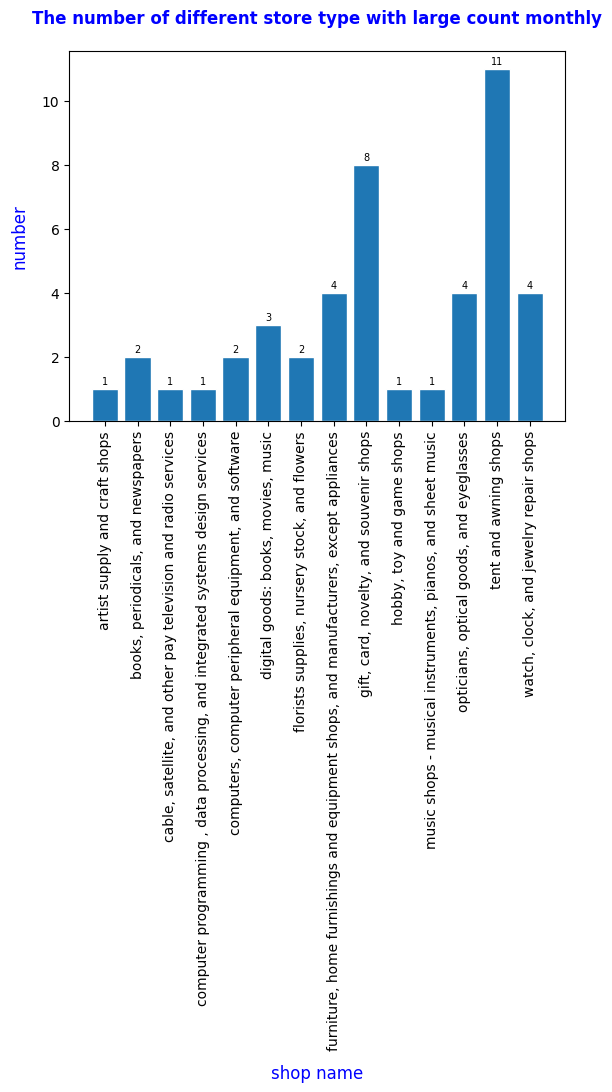

In [10]:
# store type with large count
tz_df = merchant_info_count_large[['Store_type','Revenue_levels']].groupby(['Store_type']).count()

fig, ax = plt.subplots()

y = tz_df['Revenue_levels']

bars = ax.bar(
    x = range(1,15),
    height = y, edgecolor='white',
    tick_label = tz_df.index, width = 0.8
)

plt.xticks(rotation=90)
ax.bar_label(bars, padding=2, color = 'black', fontsize=7)
ax.xaxis.grid(False)

ax.set_ylabel('number', labelpad = 10, color = 'blue', fontsize=12)
ax.set_xlabel('shop name', labelpad = 10, color = 'blue', fontsize=12)
ax.set_title('The number of different store type with large count monthly', pad = 20, color = 'blue', weight = 'bold')
plt.savefig('../plots/store_type_large_count.png', bbox_inches='tight')

## Number of different store type

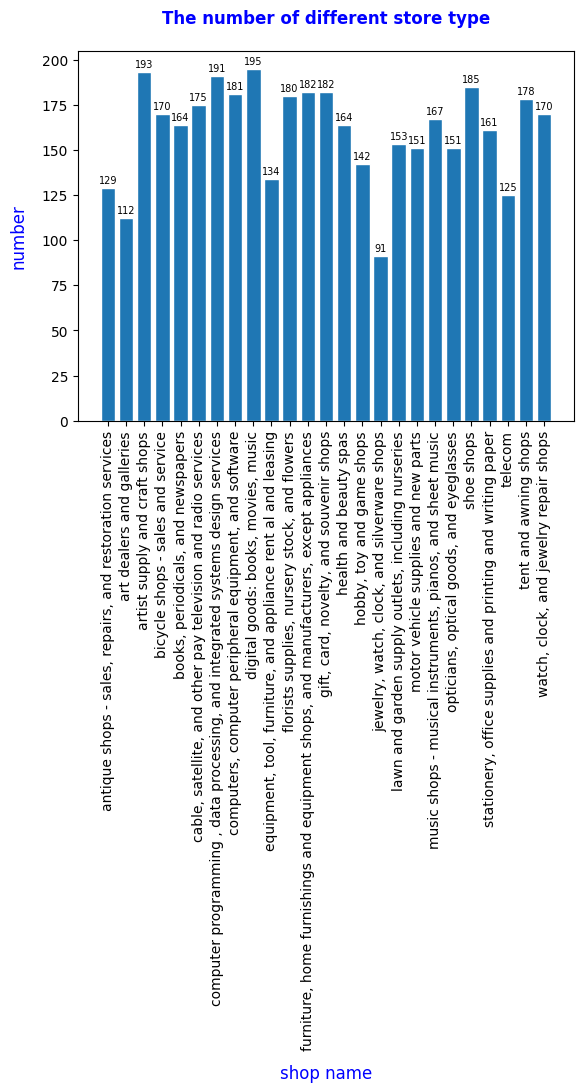

In [11]:
# store type
tz_df = merchant_info[['Store_type','Revenue_levels']].groupby(['Store_type']).count()

fig, ax = plt.subplots()

y = tz_df['Revenue_levels']

bars = ax.bar(
    x = range(1,26),
    height = y, edgecolor='white',
    tick_label = tz_df.index, width = 0.8
)

plt.xticks(rotation=90)
ax.bar_label(bars, padding=2, color = 'black', fontsize=7)
ax.xaxis.grid(False)

ax.set_ylabel('number', labelpad = 10, color = 'blue', fontsize=12)
ax.set_xlabel('shop name', labelpad = 10, color = 'blue', fontsize=12)
ax.set_title('The number of different store type', pad = 20, color = 'blue', weight = 'bold')
plt.savefig('../plots/store_type.png', bbox_inches='tight')